/tmp/ipykernel_18705/4140615863.py:15: RuntimeWarning: Mean of empty slice
  cleanLatencyAvg    = np.nanmean(   cleanLatency, axis=0)
/usr/lib64/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_18705/4140615863.py:17: RuntimeWarning: Mean of empty slice
  infectedLatencyAvg = np.nanmean(infectedLatency, axis=0)


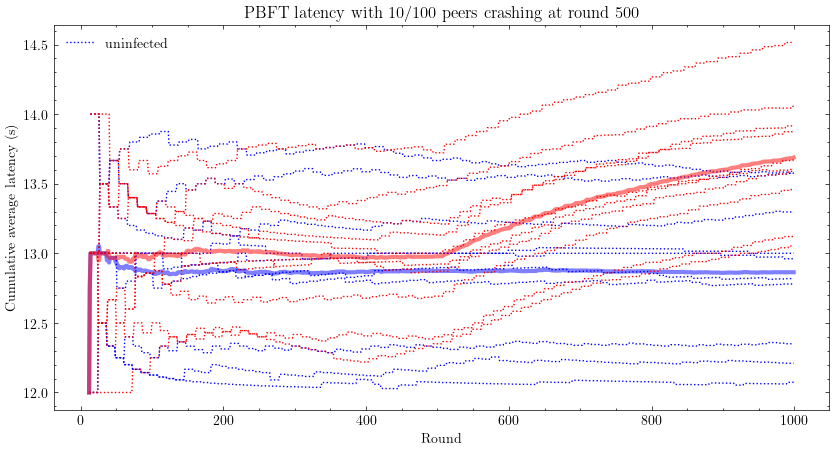

In [39]:
#!make run
%matplotlib inline
import matplotlib.pyplot as plt
import scienceplots  # scientific themes for matplotlib
import numpy as np
import json

clean    = json.load(open("analysis/PBFT/d10/r1000/p100/i00.out"))
infected = json.load(open("analysis/PBFT/d10/r1000/p100/i10.out"))

cleanLatency    = np.array(list(map(lambda x: x['latency'],    clean['tests'])), dtype=np.float64)
infectedLatency = np.array(list(map(lambda x: x['latency'], infected['tests'])), dtype=np.float64)

# averages and standard deviations, ignoring None
cleanLatencyAvg    = np.nanmean(   cleanLatency, axis=0)
cleanLatencyStd    = np.nanstd(    cleanLatency, axis=0)
infectedLatencyAvg = np.nanmean(infectedLatency, axis=0)
infectedLatencyStd = np.nanstd( infectedLatency, axis=0)

# create an array for the x axis. A range from 0 to ...
x = np.arange(0, len(cleanLatency[0]))

with plt.style.context('science'):
    # set line color to black
    plt.plot(x, cleanLatency.T,   ':', color='blue')
    plt.plot(x, cleanLatencyAvg.T,     color='blue', linewidth=3, alpha=.5)
    plt.plot(x, infectedLatency.T, ':', color='red')
    plt.plot(x, infectedLatencyAvg.T,   color='red', linewidth=3, alpha=.5)
    plt.legend(['uninfected'])
    # set line type to dotted for the first and solid for the second
    plt.xlabel('Round')
    plt.ylabel('Cumulative average latency (s)')
    plt.title('PBFT latency with 10/100 peers crashing at round 500')
    # make plot bigger
    plt.gcf().set_size_inches(10, 5)
    plt.show()
